In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import DistanceMetric

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


import matplotlib.pyplot as plt
from scipy.io import arff

from sklearn import svm

training_score = 'training score'
cross_validation_score = 'cross validation score'
y_label = 'fl score'
y_axis = 'fl score'

def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
    
def trString(df, col):
    df[col] = tfidf_vectorizer.fit_transform(df[col].astype(str)).toarray()
    return df

np.random.seed(31415) 
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
pd.set_option('display.max_columns', None)


##loading wine data ..
file = "wine.arff"
data = arff.loadarff(file)
df = pd.DataFrame(data[0])

features = ['fixed_acidity',  'pH', 'residual_sugar', 'volatile_acidity',  
'citric_acid',  'chlorides', 'free_sulfur_dioxide',  
'total_sulfur_dioxide',  'density',  'sulphates', 'alcohol']

##remove pH, residual_sugar

x_features = df[features]
y_predict = df.quality

x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=40)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train, y_train, test_size=0.2, random_state=12)

x_train1_standard = (x_train1-np.mean(x_train1))/np.std(x_train1)
x_val1_standard = (x_val1-np.mean(x_train1))/np.std(x_train1)
x_test_standard = (x_test-np.mean(x_train1))/np.std(x_train1)


train_sizes = [1, 100, 250, 400, 600, 894]
train_sizes3 = [30, 120, 250, 400, 600, 894]

fixed_acidity           855
volatile_acidity        855
citric_acid             855
residual_sugar          855
chlorides               855
free_sulfur_dioxide     855
total_sulfur_dioxide    855
density                 855
pH                      855
sulphates               855
alcohol                 855
quality                 855
dtype: int64


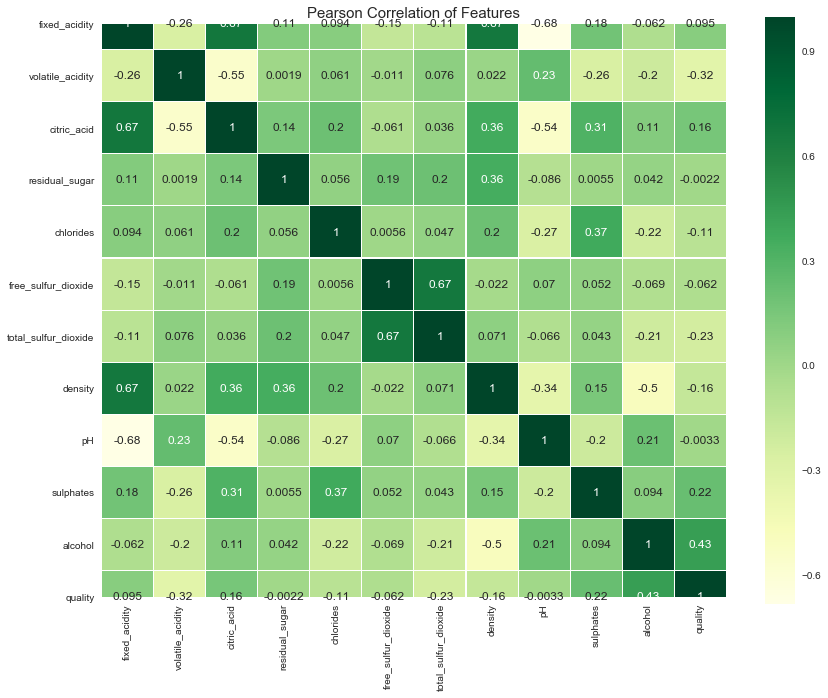

In [50]:

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

print(df[df.quality > 0].count() )

(0.0, 1.1)

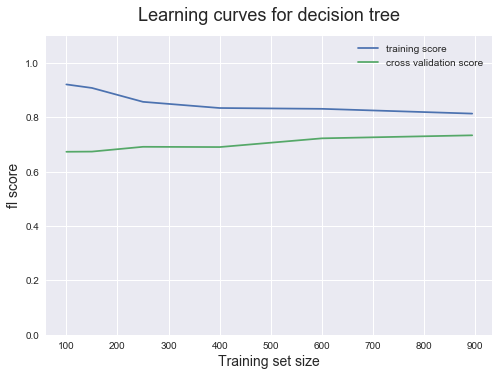

In [27]:
########DecisionTree Learning Curve####################
#########################################
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')  

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for decision tree', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)

(0.0, 1.0)

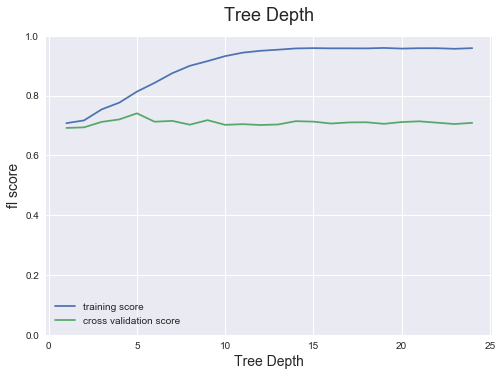

In [4]:
# HYPERPARM TREE DEPTH #####

depth = range(1,25)
new_clf = tree.DecisionTreeClassifier(min_samples_leaf=2, criterion='gini', max_leaf_nodes = 1000)  
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_depth",
param_range = depth,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(depth, train_scores_mean, label = training_score)
plt.plot(depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Tree Depth', fontsize = 14)
plt.title('Tree Depth', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(0.0, 1.0)

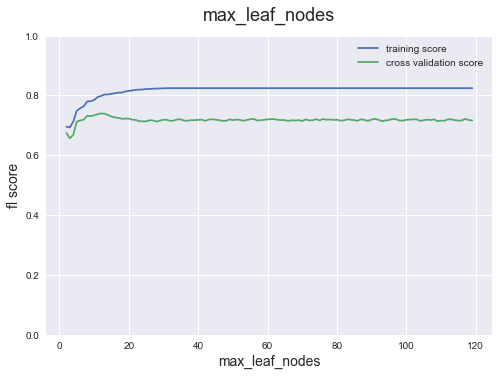

In [44]:
####HYPERPARM MIN LEAF SIZE #####

depth = range(2,120)
new_clf = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')  
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_leaf_nodes",
param_range = depth,
X = x_train,
y = y_train, cv = 3,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(depth, train_scores_mean, label = training_score)
plt.plot(depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_leaf_nodes', fontsize = 14)
plt.title('max_leaf_nodes', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(.0,1.0)

In [31]:
####model FINAL TEST 1 ######################
#######FINAL FOR DECISON TREE ###############
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini')  

clf = clf.fit(x_train1,y_train1)
#prune(clf)

y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)


feat importance = [0.         0.         0.00503158 0.04737497 0.         0.00128563
 0.         0.02602881 0.         0.02179062 0.0972923 ]
Accuracy validation set: 0.71875
Accuracy test set: 0.7270833333333333


{'0.0': {'precision': 0.7164179104477612,
  'recall': 0.6605504587155964,
  'f1-score': 0.6873508353221958,
  'support': 218},
 '1.0': {'precision': 0.7347670250896058,
  'recall': 0.7824427480916031,
  'f1-score': 0.7578558225508318,
  'support': 262},
 'accuracy': 0.7270833333333333,
 'macro avg': {'precision': 0.7255924677686835,
  'recall': 0.7214966034035997,
  'f1-score': 0.7226033289365138,
  'support': 480},
 'weighted avg': {'precision': 0.7264334688564347,
  'recall': 0.7270833333333333,
  'f1-score': 0.7258348075178263,
  'support': 480}}

(0.0, 1.1)

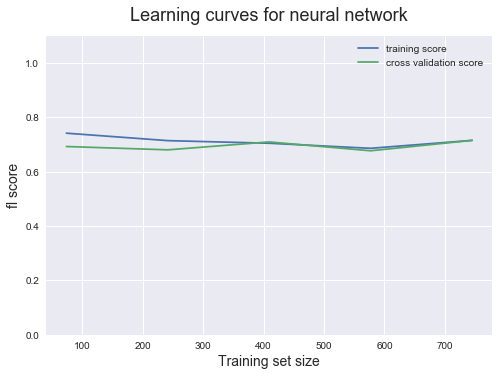

In [60]:
########NN Learning Curve ####################
###########################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7, 21), random_state=1, learning_rate='adaptive', max_iter=100000, n_iter_no_change=100)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for neural network', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(.0,1.1)

(0.0, 1.0)

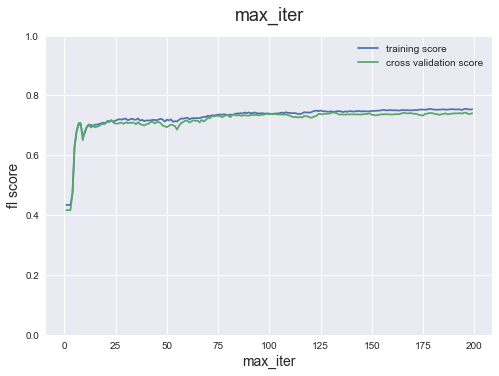

In [58]:
##### NN Hyperparam 1 ######

max_iter = range(1, 200)
new_clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9,63), random_state=1, learning_rate='adaptive')

train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_iter",
param_range = max_iter,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_iter, train_scores_mean, label = training_score)
plt.plot(max_iter, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_iter', fontsize = 14)
plt.title('max_iter', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(9, 1) [0.72777778 0.7122093 ]
(9, 2) [0.71678322 0.71794872]
(9, 3) [0.71777003 0.71454219]
(9, 4) [0.71328671 0.72340426]
(9, 5) [0.22093023 0.74111675]
(9, 6) [0.72949389 0.75585284]
(9, 7) [0.67790894 0.71328671]
(9, 8) [0.71578947 0.71326165]
(9, 9) [0.71821306 0.75814751]
(9, 10) [0.71886121 0.6962963 ]
(9, 11) [0.71858407 0.75420875]
(9, 12) [0.72212389 0.75043029]
(9, 13) [0.72340426 0.74418605]
(9, 14) [0.71071429 0.70668486]
(9, 15) [0.72569444 0.73006135]
(9, 16) [0.72142857 0.71328671]
(9, 17) [0.70231729 0.68760331]
(9, 18) [0.71821306 0.73404255]
(9, 19) [0.72413793 0.71750433]
(9, 20) [0.70070423 0.72663139]
(9, 21) [0.70422535 0.75426621]
(9, 22) [0.71047957 0.67353952]
(9, 23) [0.70318021 0.75873544]
(9, 24) [0.72407733 0.76126878]
(9, 25) [0.72310406 0.72977625]
(9, 26) [0.72597865 0.7       ]
(9, 27) [0.74750831 0.71062271]
(9, 28) [0.6984127  0.76325088]
(9, 29) [0.69642857 0.72407733]
(9, 30) [0.72468917 0.71556886]
(9, 31) [0.72013652 0.73204904]
(9, 32) [0.664451

(0.0, 1.0)

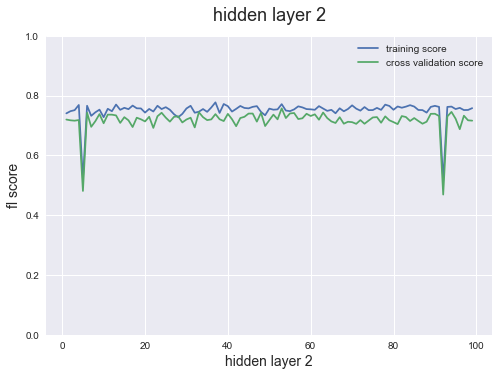

In [9]:
##### NN Hyperparam 2 ######
l = list()
max_size = 100
for i in range(1,max_size): #5,7,8
    l.append((9, i))


new_clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5,random_state=1, learning_rate='adaptive')
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "hidden_layer_sizes",
param_range = l,
X = x_train,
y = y_train, cv = 2,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

for i in range(0,len(l)):
    print(l[i], validation_scores[i])

plt.style.use('seaborn')
plt.plot(range(1,max_size), train_scores_mean, label = training_score)
plt.plot(range(1,max_size), validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('hidden layer 2', fontsize = 14)
plt.title('hidden layer 2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [55]:
####model FINAL TEST 2 ####################
#######FINAL FOR Neural Net ###############
clf = MLPClassifier(activation='relu', solver='sgd', alpha=1e-5, hidden_layer_sizes=(9,8), random_state=1, learning_rate='adaptive', max_iter=1200)
clf.fit(x_train, y_train)

#y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

#print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)


Accuracy test set: 0.6020833333333333


{'0.0': {'precision': 0.5971223021582733,
  'recall': 0.38073394495412843,
  'f1-score': 0.4649859943977591,
  'support': 218},
 '1.0': {'precision': 0.6041055718475073,
  'recall': 0.7862595419847328,
  'f1-score': 0.6832504145936982,
  'support': 262},
 'accuracy': 0.6020833333333333,
 'macro avg': {'precision': 0.6006139370028903,
  'recall': 0.5834967434694306,
  'f1-score': 0.5741182044957287,
  'support': 480},
 'weighted avg': {'precision': 0.6009340035303136,
  'recall': 0.6020833333333333,
  'f1-score': 0.5841219904213759,
  'support': 480}}

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.1)

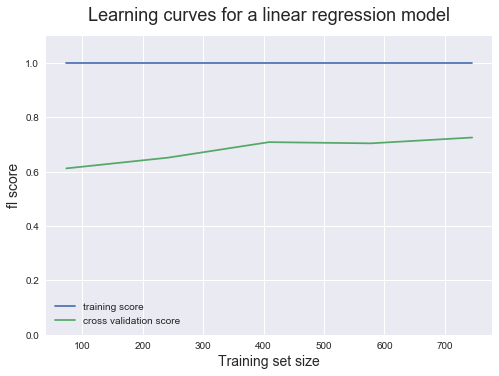

In [34]:

##change train sizes so we dont have a single set with only one class
#train_sizes = [1, 200, 559]
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate= 1.0,
    max_depth=30, random_state=23)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(.0,1.1)

(0.0, 1.1)

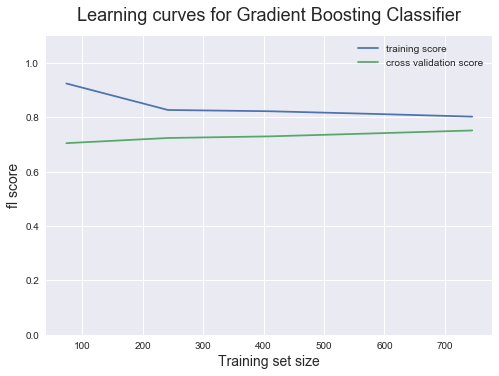

In [39]:
##TREE WITH BOOSTING Learning Curve#########
############################################

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.01,
    max_depth=3, random_state=0) #.fit(x_train, y_train)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, cv = 3, #train_sizes = train_sizes
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Gradient Boosting Classifier', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(.0,1.1)

(0.0, 1.0)

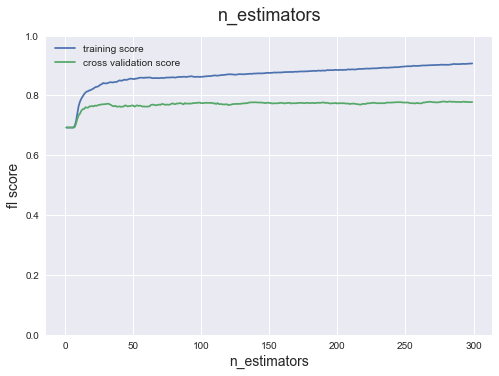

In [40]:
clf = GradientBoostingClassifier(n_estimators=1, learning_rate=.01,
    max_depth=5, random_state=3, max_leaf_nodes=20, max_features='sqrt').fit(x_train1, y_train1)
n_est = range(1,300)

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = "n_estimators",
param_range = n_est,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(n_est, train_scores_mean, label = training_score)
plt.plot(n_est, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.title('n_estimators', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(0.0, 1.0)

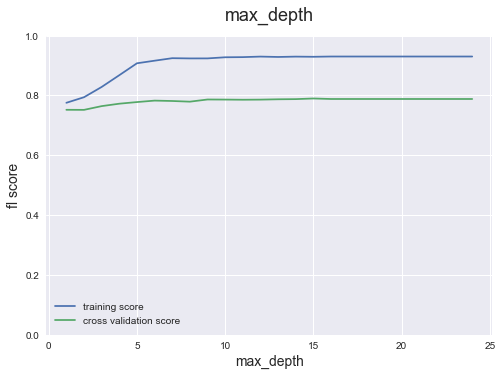

In [41]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.01,
max_depth=25, random_state=3,max_leaf_nodes=20, max_features='sqrt')
                                 
max_depth = range(1,25)

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = "max_depth",
param_range = max_depth,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_depth, train_scores_mean, label = training_score)
plt.plot(max_depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_depth', fontsize = 14)
plt.title('max_depth', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [43]:
####model FINAL TEST 3 ####################
#######FINAL FOR boosting #################
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.01,
    max_depth=8, random_state=3, max_features='sqrt', max_leaf_nodes=20).fit(x_train1, y_train1)


y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)



Accuracy validation set: 0.7723214285714286
Accuracy test set: 0.78125


{'0.0': {'precision': 0.7579908675799086,
  'recall': 0.7614678899082569,
  'f1-score': 0.7597254004576659,
  'support': 218},
 '1.0': {'precision': 0.8007662835249042,
  'recall': 0.7977099236641222,
  'f1-score': 0.7992351816443595,
  'support': 262},
 'accuracy': 0.78125,
 'macro avg': {'precision': 0.7793785755524064,
  'recall': 0.7795889067861895,
  'f1-score': 0.7794802910510127,
  'support': 480},
 'weighted avg': {'precision': 0.7813391154498854,
  'recall': 0.78125,
  'f1-score': 0.7812911560220694,
  'support': 480}}

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.0)

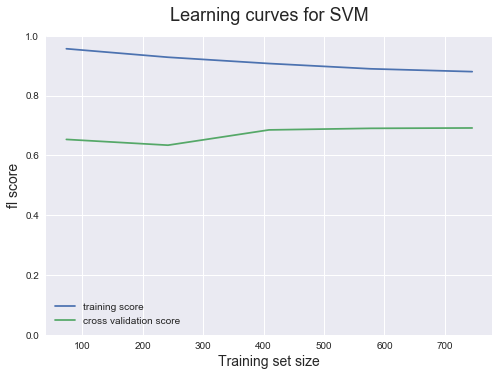

In [74]:
###### SVM #################
####################################

clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovr', C =1.0) ##nu=.5542

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, #train_sizes = train_sizes3, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(.0,1.0)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.1)

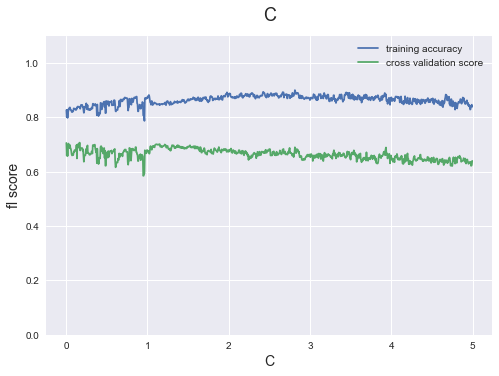

In [73]:
## C between .01 and .94
###############SVM HYPERPARAM 1 ##################
clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovr', max_iter=200) 
                                 
C = []
v = .005
for i in range(1, 1000):
    C.append(v)
    v = v + .005
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'C',
param_range = C,
X = x_train,
y = y_train, #cv = 5,
scoring = 'f1',n_jobs=-1)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(C, train_scores_mean, label = 'training accuracy')
plt.plot(C, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('C', fontsize = 14)
plt.title('C', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.1)

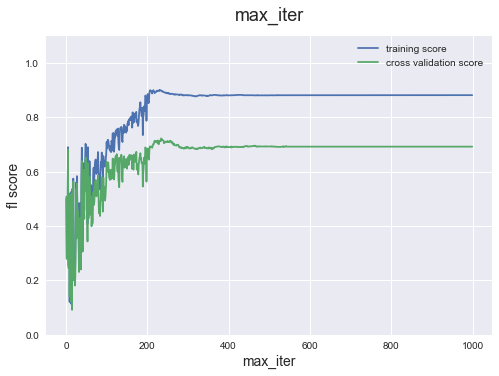

In [15]:
##  max_iter 
###############SVM HYPERPARAM 2 ##################
clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovr', C =1.0)
                                 
max_iter = range(1,1000)


train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'max_iter',
param_range = max_iter,
X = x_train,
y = y_train, #cv = 5,
scoring = 'f1',n_jobs=-1)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_iter, train_scores_mean, label = training_score)
plt.plot(max_iter, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_iter', fontsize = 14)
plt.title('max_iter', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


In [76]:
###############SVM HYPERPARAM 2 ##################
# nu between .01 and .94
###############SVM HYPERPARAM 1 ##################
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr', C =.05)
                                 
gamma = []
v = 0.0001
for i in range(1, 1000):
    gamma.append(v)
    v = v + .001
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'gamma',
param_range = gamma,
X = x_train,
y = y_train, #cv = 5,
scoring = 'f1', n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(gamma, train_scores_mean, label = training_score)
plt.plot(gamma, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('gamma', fontsize = 14)
plt.title('gamma', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [79]:
####model FINAL TEST 4 #####################
#######FINAL FOR SVM #######################
clf = svm.SVC(gamma='auto', C=1.60, kernel='rbf', decision_function_shape='ovo') ##nu=.5542
#clf = svm.NuSVC(gamma='scale', nu=.5542, kernel='rbf', shrinking=True, decision_function_shape='ovo')
clf.fit(x_train, y_train)  
#y_pred_val = clf.predict(x_val)
y_pred_test = clf.predict(x_test)

print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)

Accuracy validation set: 0.7723214285714286
Accuracy test set: 0.71875


{'0.0': {'precision': 0.7044334975369458,
  'recall': 0.6559633027522935,
  'f1-score': 0.679334916864608,
  'support': 218},
 '1.0': {'precision': 0.7292418772563177,
  'recall': 0.7709923664122137,
  'f1-score': 0.7495361781076066,
  'support': 262},
 'accuracy': 0.71875,
 'macro avg': {'precision': 0.7168376873966318,
  'recall': 0.7134778345822537,
  'f1-score': 0.7144355474861073,
  'support': 480},
 'weighted avg': {'precision': 0.7179747381337697,
  'recall': 0.71875,
  'f1-score': 0.7176531052930781,
  'support': 480}}

(0.0, 1.0)

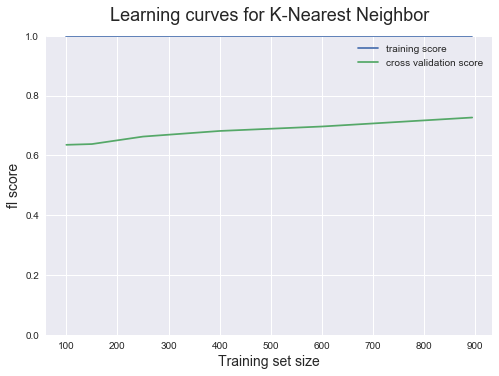

In [24]:
####KNN Learning Cruve######################
# ############################################
train_sizes = [100, 150, 250, 400, 600, 894]
clf = KNeighborsClassifier(algorithm = 'brute', metric='manhattan', weights='distance')
# clf.fit(x_train1, y_train1)  
# y_pred_val = clf.predict(x_val1)
# y_pred_test = clf.predict(x_test)

# print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
# print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

# metrics.classification_report(y_test, y_pred_test, output_dict = True)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_axis, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for K-Nearest Neighbor', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)




(0.0, 1.1)

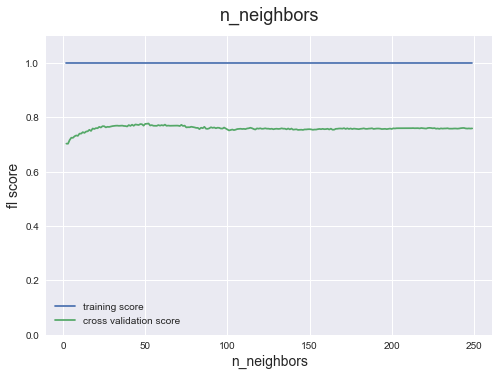

In [19]:
####KNN Hyperparam 1####

n_neighbors = range(2,250)
clf = KNeighborsClassifier(algorithm = 'brute', metric='manhattan', weights='distance')
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'n_neighbors',
param_range = n_neighbors,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(n_neighbors, train_scores_mean, label = training_score)
plt.plot(n_neighbors, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_axis, fontsize = 14)
plt.xlabel('n_neighbors', fontsize = 14)
plt.title('n_neighbors', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


(0.0, 1.1)

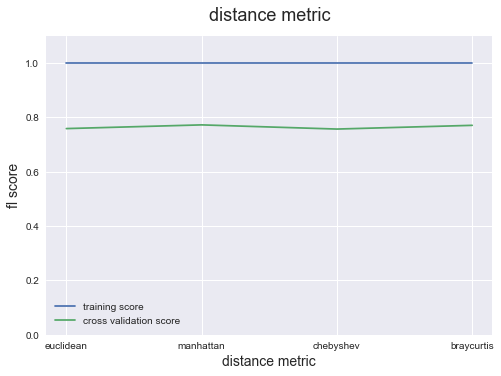

In [26]:
####KNN Hyperparam 2####

###distance metrics
## euclidean, manhattan, chebyshev, minkowsk, mahalanobis
## braycurtis
metric = ['euclidean', 'manhattan', 'chebyshev','braycurtis']
#leaf_size = range(2,100)
clf = KNeighborsClassifier(n_neighbors = 45, algorithm = 'brute', weights='distance')
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'metric',
param_range = metric,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(metric, train_scores_mean, label = training_score)
plt.plot(metric, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('distance metric', fontsize = 14)
plt.title('distance metric', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)

In [25]:
####model FINAL TEST 5 ####################
#######FINAL FOR KNN ######################

clf = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 45, weights='distance', metric='manhattan')
clf.fit(x_train, y_train)  
#y_pred_val = clf.predict(x_val1_standard)
y_pred_test = clf.predict(x_test)

#print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)

Accuracy test set: 0.75625


{'0.0': {'precision': 0.7370892018779343,
  'recall': 0.7201834862385321,
  'f1-score': 0.7285382830626449,
  'support': 218},
 '1.0': {'precision': 0.7715355805243446,
  'recall': 0.7862595419847328,
  'f1-score': 0.77882797731569,
  'support': 262},
 'accuracy': 0.75625,
 'macro avg': {'precision': 0.7543123912011394,
  'recall': 0.7532215141116325,
  'f1-score': 0.7536831301891674,
  'support': 480},
 'weighted avg': {'precision': 0.7558911835557666,
  'recall': 0.75625,
  'f1-score': 0.7559880745090986,
  'support': 480}}